<html>
<body>
<h1 style="background-color: #022851;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b>Introduction to Machine Learning</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>WEEK 5 Assignment </b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>Name:</b> Blue Ferdinand Alday </font> <br>
    <font color=#FFBF00><b>Due Date:</b> 10/13/2024 </font>
   </font> 
    </center>
</h1>
</body>
</html>


In this assignment , use Boston Housing data set, the data set contains information about the housing values in suburbs of Boston. 
In this assignment we are using classifier instead of regression. 

I have converted this problem from regression to classification.  

Bin the price into three categories

<font color = 'blue'> Perform the following: </font>

Plot a barplot to check how many datapoints are in different subcategories. **DONE**

use Decision Tree and Random Forest classifier to predict the category of the price. Comment on the accuracy and ways to improve the performance. **DONE**

**Perform Hyperparameter Tuning and Training the model**

Define a Decision tree classifier and perform Grid_Search_CV with the following parameters  **DONE**

Criterion = [‘gini’,’entropy’]
Max_depth= [2,3,10,15]

Train your decision tree on the best set of parameters obtained from step 5.2 . Calculate accuracy and log loss on train data and test data. Also plot confusion matrix for train and test data.    **DONE**

Use graphviz library to visualize the decision tree. ***DONE**


**Training Random Forest model**

Define a Random Forest classifier and Grid_Search_CV with the following parameters **DONE**

N_estimators = 2,30,50,100
Max_depth= 1,2,3,5

Train your Random forest model on the best set of parameters obtained from step 6.2 . Calculate accuracy train data and test data. Also plot confusion matrix for train and test data.  **DONE**

**NOTE** I have binned the price into three categories (low, med and high) you can bin as you like. I have given the code for binning



In [1]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError

In [2]:
# from sklearn.datasets import load_boston
boston = pd.read_csv("Boston.csv")

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df_x = boston.iloc[:, :-1]
df_y = boston.MEDV

In [6]:
df_y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

Feature name

In [7]:
print(df_x.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [8]:
df_x.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [9]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


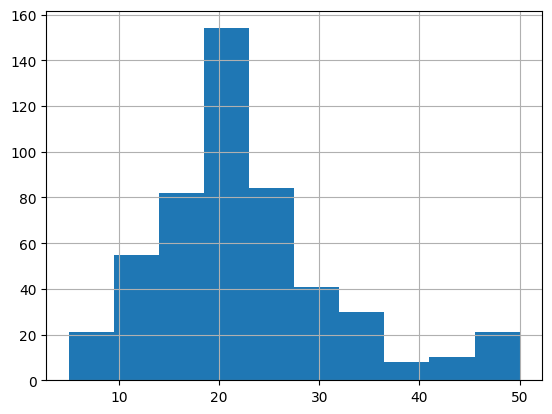

In [10]:
plt.hist(df_y)
plt.grid(True)
plt.show()

In [11]:
bins_cut = [0, 20, 30, 50]
label_y = ["low", "med", "high"]
df_y_bin = pd.cut(df_y, bins=bins_cut, labels=label_y)
df_y_bin.value_counts()

MEDV
low     215
med     207
high     84
Name: count, dtype: int64

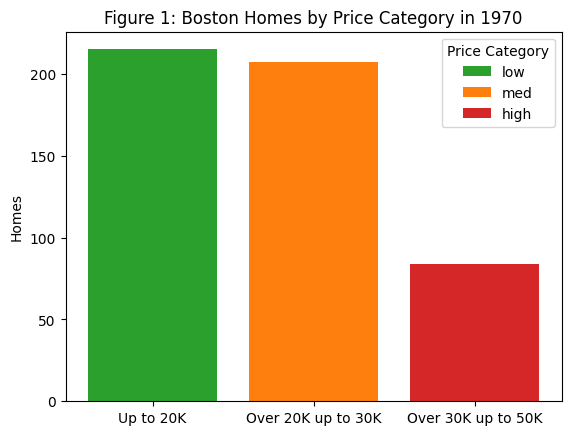

In [12]:
# Exercise 1: Plot a barplot to check how many datapoints are in different subcategories.
# See https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset to verify feature MEDV
# Find an example of a barplot in matplotlib and modify accordingly

# label the bins to be more readable
price_cutoffs = ["Up to 20K", "Over 20K up to 30K", "Over 30K up to 50K"]
fig, ax = plt.subplots()

bar_colors = ["tab:green", "tab:orange", "tab:red"]

ax.bar(price_cutoffs, df_y_bin.value_counts(), label=label_y, color=bar_colors)

ax.set_ylabel("Homes")
ax.set_title("Figure 1: Boston Homes by Price Category in 1970")
ax.legend(title="Price Category")
plt.show()

In [13]:
# Exercise 2a: Use Decision Tree classifier to predict the category of the price.
# Comment on the accuracy and ways to improve the performance.

# first clean up the X by removing rows with blank entries in any column and remove the same rows from Y
# both row counts should now be equal
if df_x.isnull().values.any():
    df_x_no_nulls = df_x.dropna()
    df_y_no_nulls = boston
    df_y_no_nulls = df_y_no_nulls.dropna()
    df_y_no_nulls = df_y_no_nulls[df_y_no_nulls.columns[-1]].to_frame()

# Now convert Y to its categorical name and save it to a DataFrame
# Note that the dataset maybe smaller due to removing rows with null values
y_category = df_y_no_nulls["MEDV"].tolist()
y_category = list(
    map(
        lambda x: (
            "low" if float(x) <= 20.0 else ("med" if float(x) <= 30.0 else "high")
        ),
        y_category,
    )
)
target = pd.DataFrame(y_category, columns=["MEDV"])
target

,MEDV
0,med
1,med
2,high
3,high
4,med
...,...
389,low
390,low
391,med
392,med


In [14]:
# Ensure that the categories have counts as expected
target.value_counts()

MEDV
low     170
med     161
high     63
Name: count, dtype: int64

In [15]:
# Use label encoding to encode the data based on the categories of the bins
# If a warning appears where y is one dimensional, use np.squeeze as described on the bottom of the page here:
# https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
le = LabelEncoder()
encoded_target = le.fit_transform(np.array(np.squeeze(target)))
encoded_target

array([2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
# configure the training and testing data from the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_x_no_nulls, np.array(encoded_target), test_size=0.2, random_state=1
)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (315, 13)
Testing split input-  (79, 13)


Decision Tree Classifier Created

Figures 2 & 2a
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.87      0.89      0.88        37
           2       0.77      0.80      0.79        30

    accuracy                           0.84        79
   macro avg       0.85      0.81      0.83        79
weighted avg       0.84      0.84      0.84        79



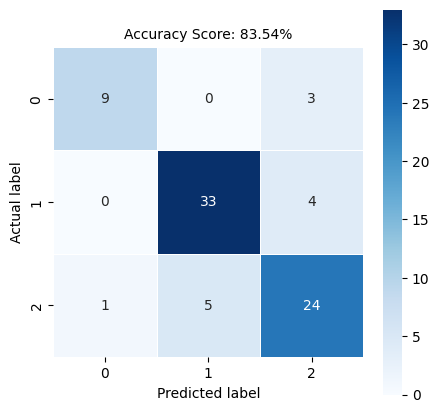

In [17]:
# Create the decision tree without any tuning parameters and fit the training and testing data to it
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree Classifier Created")
print()

# Run the predictions with the untuned Decision Tree model
y_pred = dt.predict(X_test)
print("Figures 2 & 2a\n", classification_report(y_test, y_pred))

# use the example from the lectures to create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=0.5, annot=True, square=True, cmap="Blues")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {:.2f}".format(dt.score(X_test, y_test) * 100)  + "%"
plt.title(all_sample_title, size=10)
plt.show()

We got an accuracy of 84% on the testing dataset of 79 records from the classification report and confusion matrix. We can improve performance by tuning the parameters max_depth or criterion.


Figures 2b & 2c
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.87      0.92      0.89        37
           2       0.83      0.80      0.81        30

    accuracy                           0.86        79
   macro avg       0.87      0.85      0.86        79
weighted avg       0.86      0.86      0.86        79

[[10  0  2]
 [ 0 34  3]
 [ 1  5 24]]
0.8607594936708861
0.8607594936708861


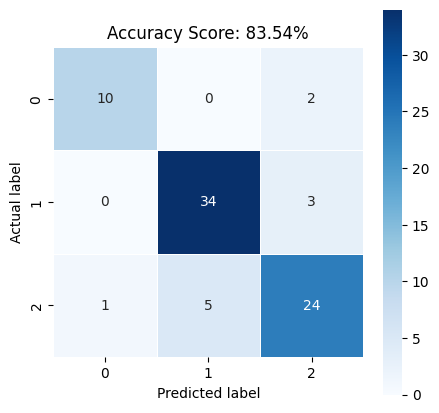

In [18]:
# Exercise 2b: Use Random Forest classifier to predict the category of the price.
# Comment on the accuracy and ways to improve the performance.

# create a random forest, train the model and run a prediction
# show confusion matrix, accuracy score, and classification reports
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Figures 2b & 2c\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(rf.score(X_test, y_test))

# use the example from the lectures to create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=0.5, annot=True, square=True, cmap="Blues")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {:.2f}".format(dt.score(X_test, y_test) * 100)  + "%"
plt.title(all_sample_title, size=12)
plt.show()

We got an accuracy of 84% on the testing dataset of 79 records using the Random Forest model that is identical to the decision tree. We can imporove performance by tuning the parameters n_estimators, max_depths, max_features, run a grid search to find the best combination. In addition, we can use feature reduction and variable reduction methods.


In [19]:
# Exercise 3a: Turn the Decision Tree parameters by running a GridSearchcv with criterion and max_depth

start = time.time()
Criterion = ["gini", "entropy"]
Max_depth = [2, 3, 10, 15]

parameters = {"max_depth": Max_depth, "criterion": Criterion}

# create the model
optimized_dt = DecisionTreeClassifier()

# fit the model
dt_model = GridSearchCV(optimized_dt, parameters)

dt_model.fit(X_train, y_train)
print("Best Parameters using grid search: \n", dt_model.best_params_)


# Set the dt to the best combination of parameters
optimized_dt = dt_model.best_estimator_

# Fit the best algorithm to the data.
optimized_dt.fit(X_train, y_train)

end = time.time()
print("Time taken in grid search: {0: .2f}".format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 15}
Time taken in grid search:  0.19


C:\Users\blue_\anaconda3\envs\sklearn-env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Figures 3 & 3a
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.85      0.89      0.87        37
           2       0.79      0.77      0.78        30

    accuracy                           0.84        79
   macro avg       0.85      0.83      0.84        79
weighted avg       0.84      0.84      0.83        79

[[10  0  2]
 [ 0 33  4]
 [ 1  6 23]]
0.8354430379746836
0.8354430379746836
Training split input-  (315, 13)
Testing split input-  (79, 13)


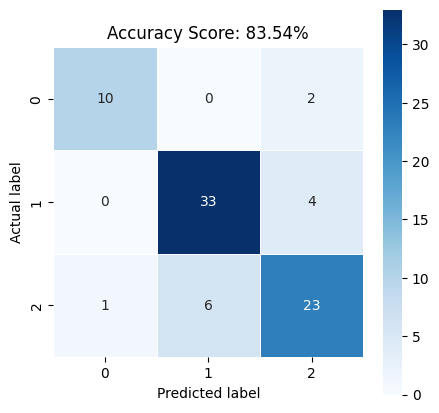

In [20]:
# use the suggested tuning parameters from GridSearch for the Decision Tree
optimized_dt = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=3)

""" # Now convert Y to its categorical name and save it to a DataFrame
df_y = df_y.to_frame('MDEV')
df_y
y_category_with_nulls = df_y.values
y_category_with_nulls = list(map(lambda x : "low" if float(x) <= 20.0 else ("med" if float(x) <= 30.0 else "high"), y_category_with_nulls))
target = pd.DataFrame(y_category_with_nulls, columns=['MEDV'])
target

encoded_target_with_nulls = le.fit_transform(np.array(target))
#encoded_target_with_nulls
# use all data this time, even if colunmns have nulls
X_train, X_test, y_train, y_test = train_test_split(df_x, np.array(encoded_target_with_nulls), test_size=0.2, random_state=8)
"""
optimized_dt.fit(X_train, y_train)

# Predicting the values of test data
y_pred = optimized_dt.predict(X_test)
print("Figures 3 & 3a\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(optimized_dt.score(X_test, y_test))
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)


# use the example from the lectures to create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=0.5, annot=True, square=True, cmap="Blues")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {:.2f}".format(dt.score(X_test, y_test) * 100)  + "%"
plt.title(all_sample_title, size=12)
plt.show()

The accuracy did not improve in the classification report after applying performance tuning to the decision tree.

In [21]:
import graphviz
import os

os.environ["PATH"] += (
    os.pathsep + "C:/Users/blue_/anaconda3/envs/sklearn-env/Library/bin"
)
# C:\Users\blue_\anaconda3\envs\sklearn-env\Library\bin
feature_list = list(X_train.columns)


dot_data = tree.export_graphviz(
    optimized_dt,
    feature_names=feature_list,
    class_names=label_y,
    filled=True,
    rounded=True,
    special_characters=True,
    out_file=None,
)
graph = graphviz.Source(dot_data)
graph.render("decisiontree")

'decisiontree.pdf'

In [22]:
from IPython.display import IFrame

IFrame("decisiontree.pdf", width=800, height=600)

In [23]:
# Exercise 3b: Use Random Forest classifier to predict the category of the price.
# Comment on the accuracy and ways to improve the performance.


# Define a Random Forest classifier and Grid_Search_CV with the following parameters
# N_estimators = 2,30,50,100
# Max_depth= 1,2,3,5

# Train your Random forest model on the best set of parameters obtained from step 6.2 .
# Calculate accuracy train data and test data. Also plot confusion matrix for train and test data.

start = time.time()
N_estimators = [2, 30, 50, 100]
Max_depth = (1, 2, 3, 5)
parameters = {"max_depth": Max_depth, "n_estimators": N_estimators}

optimized_rf = RandomForestClassifier(random_state=4)

optimized_rf_model = GridSearchCV(optimized_rf, parameters, cv=10, n_jobs=3)

optimized_rf_model.fit(X_train, y_train)
print("Best Parameters using grid search: \n", optimized_rf_model.best_params_)


# Set the rf to the best combination of parameters
optimized_rf = optimized_rf_model.best_estimator_

# Fit the best algorithm to the data.
optimized_rf.fit(X_train, y_train)

end = time.time()
print("Time taken in grid search: {0: .2f}".format(end - start))

Best Parameters using grid search: 
 {'max_depth': 5, 'n_estimators': 30}
Time taken in grid search:  7.57


C:\Users\blue_\anaconda3\envs\sklearn-env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Figures 3b & 3c
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.87      0.79      0.83        34
           2       0.66      0.81      0.72        26

    accuracy                           0.78        79
   macro avg       0.80      0.78      0.78        79
weighted avg       0.80      0.78      0.79        79

[[14  1  4]
 [ 0 27  7]
 [ 2  3 21]]
0.7848101265822784
0.7848101265822784


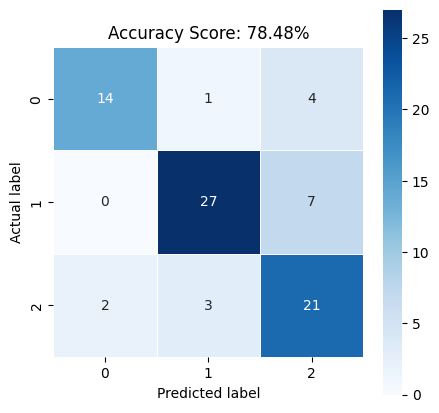

In [24]:
# create a random forest, train the model and run a prediction
# show confusion matrix, accuracy score, and classification reports
X_train, X_test, y_train, y_test = train_test_split(
    df_x_no_nulls, np.array(encoded_target), test_size=0.2, random_state=4
)
rf = RandomForestClassifier(random_state=6, max_depth=5, n_estimators=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Figures 3b & 3c\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(rf.score(X_test, y_test))

# use the example from the lectures to create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=0.5, annot=True, square=True, cmap="Blues")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {:.2f}".format(rf.score(X_test, y_test) * 100)  + "%"
plt.title(all_sample_title, size=12)
plt.show()

We got an accuracy of 78% on the classification report and 91% onthe confusion matrix testing dataset of 79 records using the Random Forest model after tuning the hyperparameters.